In [2]:
#Pandas para o processamento de dados e tratamento dos dados
#numpy para algebra linear
#matplotlib e seaborn para plotar os graficos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#faz com que todas as colunas sejam mostradas na tela
pd.options.display.max_columns = None


In [4]:
#importa o dataset train e o dataset test criando dataframes na memoria com respectivos nomes
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [5]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

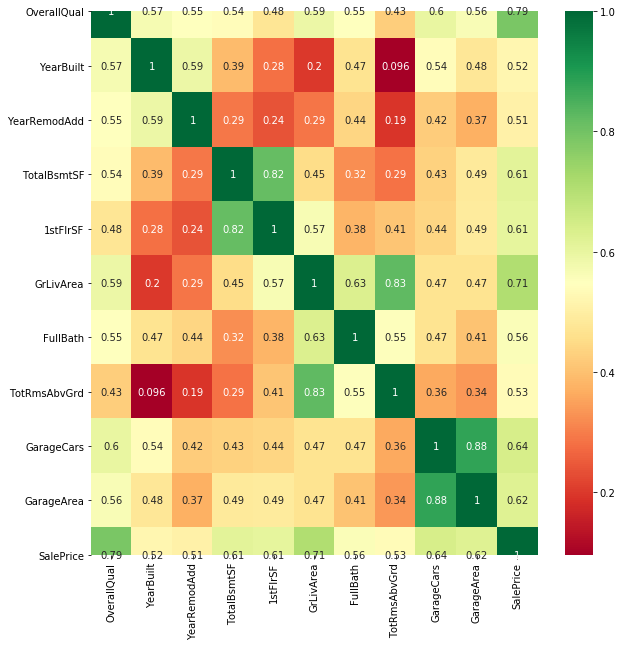

In [6]:
#Matrix de correlação

correlatedMatrix = train.corr()
mostCorrelatedFeatures = correlatedMatrix.index[abs(correlatedMatrix["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[mostCorrelatedFeatures].corr(),annot=True,cmap="RdYlGn")

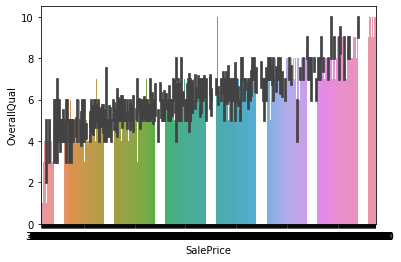

In [7]:
sns.barplot(train.SalePrice, train.OverallQual)

In [8]:
sns.distplot(train.SalePrice,fit=norm)


NameError: name 'norm' is not defined

In [10]:
#O teste de shapiro wilk testa se os dados são normalmente distribuidos
from scipy import stats
stats.shapiro(train.SalePrice)


(0.869671642780304, 3.206247534576162e-33)

In [32]:
#Retirando colunos onde mais de 80% dos valores sejam NA
train = train.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,)

In [33]:
(train.isnull().sum()/train.shape[0]).sort_values(ascending=False)

FireplaceQu      0.472603
LotFrontage      0.177397
GarageYrBlt      0.055479
GarageType       0.055479
GarageFinish     0.055479
                   ...   
CentralAir       0.000000
HeatingQC        0.000000
SaleCondition    0.000000
TotalBsmtSF      0.000000
Id               0.000000
Length: 77, dtype: float64

In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
train.hist(figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9c3856450>,
      dtype=object)

In [ ]:
train[['MSSubClass', 'SalePrice']].groupby(['MSSubClass']).mean()


In [ ]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))


sns.barplot(x='MSSubClass', y='SalePrice', data=train, ax=axis1)
sns.barplot(x='MSZoning', y='SalePrice', data=train, ax=axis2)
sns.barplot(x='LotFrontage', y='SalePrice', data=train, ax=axis3)

In [21]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,6)


sns.barplot(x='LotArea', y='SalePrice', data=train, ax=axis1)
sns.barplot(x='Street', y='SalePrice', data=train, ax=axis2)
sns.barplot(x='Alley', y='SalePrice', data=train, ax=axis3)

SyntaxError: invalid syntax (<ipython-input-21-7b50b5f0df8f>, line 4)

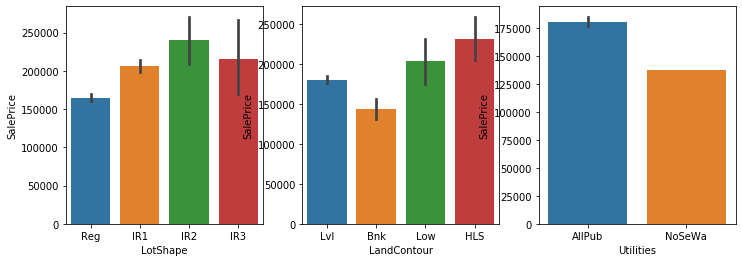

In [20]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='LotShape',y='SalePrice', data=train, ax=axis1)
sns.barplot(x='LandContour', y='SalePrice',data=train, ax=axis2)
sns.barplot(x='Utilities',y='SalePrice',data=train,ax=axis3)


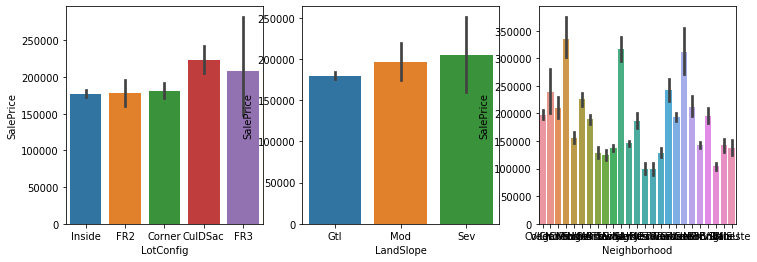

In [23]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))


sns.barplot(x='LotConfig',y='SalePrice',data=train,ax=axis1)
sns.barplot(x='LandSlope',y='SalePrice',data=train,ax=axis2)
sns.barplot(x='Neighborhood',y='SalePrice',data=train,ax=axis3)

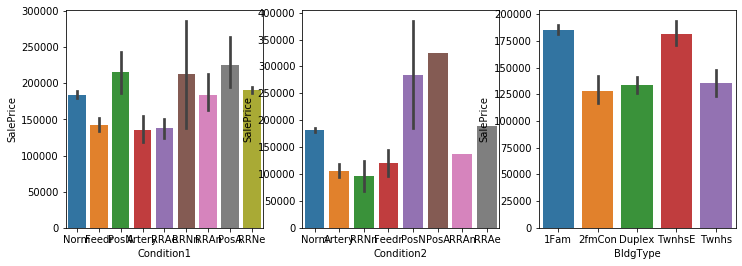

In [24]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))


sns.barplot(x='Condition1',y='SalePrice',data=train,ax=axis1)
sns.barplot(x='Condition2',y='SalePrice',data=train,ax=axis2)
sns.barplot(x='BldgType',y='SalePrice',data=train,ax=axis3)

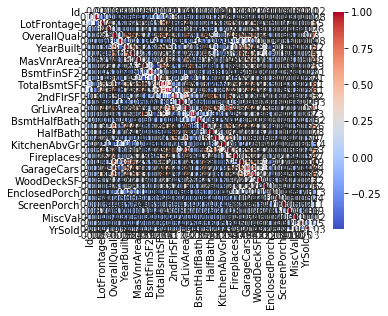

In [28]:
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);